In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?(5점)

In [7]:
# 유의수준(a) = 0.1, a/2의 z = 1.645, 추정오차한계(d) = 0.05
# 최소 표본크기 n = 1/4 * (z / d) ** 2
n = 1/4 * (1.645 / 0.05)**2
print("표본 크기는 ",n," 보다 크거나 같아야함") # 270.60249999999996
print("따라서 최소 표본의 크기는 ",round(n),"이다.")

표본 크기는  270.60249999999996  보다 크거나 같아야함
따라서 최소 표본의 크기는  271 이다.


# 2. 다음은 1월부터 9월까지의 은의 가격이다.
## 1월 : 22.3,  2월 : ..,  .., 9월 : 40.2

### 2-1. 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라(5점).

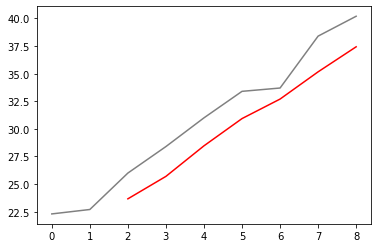

In [31]:
# 데이터가 없어서 대략 22.3 ~ 40.2 사이로 증가하는 랜덤 값 생성
data = [22.3]+sorted([round(n, 1) for n in np.random.uniform(22.3, 40.2, 7)])+[40.2]
data = pd.DataFrame(data)
data3 = data.rolling(3).mean()
plt.plot(data, color='grey')
plt.plot(data3, color='red')

### 2-2. 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림(5점).

In [1]:
print(f'{round((40.2 / 22.3 - 1)*100, 2)}%')

80.27%


# 3. 선거
### 3-1. 연구가설과 귀무가설을 설정하라 (5점)

In [12]:
print('''
 - H0 귀무가설: 선거구별로 A후보의 지지율의 차이는 없다. 
 - H1 연구가설: 선거구별로 A후보의 지지율은 유의미한 차이가 있다.
''')


 - H0 귀무가설: 선거구별로 A후보의 지지율의 차이는 없다. 
 - H1 연구가설: 선거구별로 A후보의 지지율은 유의미한 차이가 있다.



### 3-2. 통계량을 구하고, 연구가설 채택 여부를 기술하라(5점).

In [5]:
import pandas as pd
from scipy import stats 

table = pd.DataFrame({'1선거구':[172, 45], '2선거구':[124,58], '3선거구':[157,65]},
                     index=['지지함', '지지하지 않음'])
   
f, p, _, _ = stats.chi2_contingency(observed=table)

print("검정통계량 : ", f)
print("p-value : ", p)
print()
print("p-value가 ",p,'로 유의수준 95%하에서 귀무가설을 기각한다.')
print("즉 선거구별로 A후보의 지지율은 유의미한 차이가 있다고 할 수 있다.")

검정통계량 :  7.081891215739675
p-value :  0.02898590481917518

p-value가  0.02898590481917518 로 유의수준 95%하에서 귀무가설을 기각한다.
즉 선거구별로 A후보의 지지율은 유의미한 차이가 있다고 할 수 있다.


# 4. A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.
### 4-1. 연구가설과 귀무가설 설정하라(5점).

In [6]:
print('''
- H0 귀무가설: 남학생과 여학생의 평균 혈압의 차이는 없다. 
- H1 연구가설: 남학생과 여학생의 평균 혈압은 유의미한 차이가 있다.
''')


- H0 귀무가설: 남학생과 여학생의 평균 혈압의 차이는 없다. 
- H1 연구가설: 남학생과 여학생의 평균 혈압은 유의미한 차이가 있다.



### 4-2. 통계량을 구하고, 연구가설 채택 여부를 기술하라(5점).

In [37]:
d1 = pd.Series(stats.norm(30, 8).rvs(16))
d2 = pd.Series(stats.norm(30, 8).rvs(9))
data = pd.concat([d1, d2], axis=1)
data.columns = ['남자', '여자']
display(data)
# data = pd.DataFrame(pd.concat())
# display(data)

s, p = stats.ttest_ind(data['남자'], data['여자'].dropna(), equal_var=True)
print('통계량 = ',s)
print('p-value = ',p)

if p > 0.05:
    print('95% 유의수준 하에서 p-value가 0.05보다 크므로 귀무가설 채택.')
    print('즉, 남학생과 여학생의 평균 혈압 차이가 없다.')
else:
    print('95% 유의수준 하에서 p-value가 0.05보다 작으므로 귀무가설 기각.')
    print('즉, 남학생과 여학생의 평균 혈압 차이가 있다.')

print('\n** 남녀 혈압 평균 = ')
mm = data['남자'].mean()
fm = data['여자'].mean()
print('남자 = ',mm)
print('여자 = ',fm)

,남자,여자
0,47.303636,37.405648
1,34.887840,47.369707
2,27.681112,41.153413
3,27.225157,27.782907
4,39.728308,25.272648
5,17.192887,30.235814
6,27.718671,29.774692
7,35.241186,35.577334
8,26.043893,30.822757
9,16.996503,NaN


통계량 =  -1.093483758844214
p-value =  0.28550224061240215
95% 유의수준 하에서 p-value가 0.05보다 크므로 귀무가설 채택.
즉, 남학생과 여학생의 평균 혈압 차이가 없다.

** 남녀 혈압 평균 = 
남자 =  30.472709540752902
여자 =  33.93276894731488


### 4-3. 4-2에서 구한 검정통계량 값을 바탕으로 신뢰구간을 구하라(5점)

In [38]:
# z값이 주어졌겠지..? 주어졌다는 가정 하에 95% 유의수준의 z값 설정
z = 1.96
ci_1 = z * data['남자'].std() / np.sqrt(16)
ci_2 = z * data['여자'].std() / np.sqrt(9)

print('남자의 신뢰구간 : (',mm-ci_1,",",mm+ci_1,')')
print('여자의 신뢰구간 : (',fm-ci_2,',',fm+ci_2,')')

남자의 신뢰구간 : ( 26.623680308561507 , 34.3217387729443 )
여자의 신뢰구간 : ( 29.307797417715335 , 38.55774047691442 )


# 5. height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 weight.csv파일을 가지고 다음을 분석하라.
### 5-1 키와 몸무게를 독립변수로 받아 허리둘레를 추정하는 베이지안 모델을 제시하라. burn-in은 1,000, MCMC는 10,000으로 넣고, …(5점).

### 5-2. 5-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라(5점).